In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
pt = pd.read_csv("rosetta-anonymized-complete.csv")
pt.head()

,Group,Pt-nr,Tissue,Sample,ID,Visit,Patient
0,HC,1,LN,BB4726,LN87,first,HC-1
1,HC,2,LN,BB4727,LN88,first,HC-2
2,HC,3,LN,BB5491,LN14,first,HC-3
3,HC,4,LN,BB5492,LN13,first,HC-4
4,HC,5,LN,BB5531,LN25,first,HC-5


In [3]:
myfiles = [x for x in os.listdir(".") if x.startswith("LN-aa-run")]
myfiles

['LN-aa-run141-2019-09-10-clones-script20150427.csv',
 'LN-aa-run169-2019-09-10-clones-script20150427.csv',
 'LN-aa-run160-2019-09-10-clones-script20150427.csv',
 'LN-aa-run181-2019-09-10-clones-script20150427.csv',
 'LN-aa-run81-2019-10-21-clones-script20150427.csv',
 'LN-aa-run142-2019-10-17-clones-script20150427.csv',
 'LN-aa-run98-2019-10-17-clones-script20150427.csv',
 'LN-aa-run74-2019-10-21-clones-script20150427.csv',
 'LN-aa-run162-2019-10-29-clones-script20150427.csv']

## Read and combine data

In [4]:
clones = pd.read_csv(myfiles[0], sep=",")
clones.head()

,Unnamed: 0,analysis,MID.no,primer,MID.x,ID,project,reads,region,run,...,V.gene,J.gene,CDR3,codon,call.run,VJCDR3,count,total.reads,freq.clone,cumsum
0,1,BCR heavy,23,397,TCTGGACTTA,LN13,LN-study,10000,1,141,...,4.59*01,1*01,CARDRAPYRHWGQGTLVT,1,1,4.59*01_1*01-CARDRAPYRHWGQGTLVT,2749,7200,38.181,38.181
1,492,BCR heavy,23,397,TCTGGACTTA,LN13,LN-study,10000,1,141,...,4.59*02,1*01,CARDRAPYRHWGQGTLVT,2,1,4.59*02_1*01-CARDRAPYRHWGQGTLVT,255,7200,3.542,41.723
2,1051,BCR heavy,23,397,TCTGGACTTA,LN13,LN-study,10000,1,141,...,3.7*01,4*02,CAGGPYWGQGALVT,2,1,3.7*01_4*02-CAGGPYWGQGALVT,128,7200,1.778,43.501
3,11,BCR heavy,23,397,TCTGGACTTA,LN13,LN-study,10000,1,141,...,4.4*07,1*01,CARDRAPYRHWGQGTLVT,1,1,4.4*07_1*01-CARDRAPYRHWGQGTLVT,125,7200,1.736,45.237
4,1075,BCR heavy,23,397,TCTGGACTTA,LN13,LN-study,10000,1,141,...,3.7*01,4*02,CVKDEITMFRGDLGNWGQGTLVT,2,1,3.7*01_4*02-CVKDEITMFRGDLGNWGQGTLVT,121,7200,1.681,46.918


In [5]:
for myfile in myfiles[1:]:
    tmp_clones = pd.read_csv(myfile, sep=",")
    clones = clones.append(tmp_clones)
clones.tail()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,CDR3,ID,J.gene,MID.,MID.ID,MID.n,MID.no,MID.x,MID.y,READS.N,...,project,pt,reads,reads.n,region,run,sample,species,species.1,total.reads
24896,CARWFGNLMDVWGQGTTVT,LN50,6*01,NaN,NaN,NaN,25.0,CGATCTCTTA,CGATCTCTTA,NaN,...,LN-study,LN50,3125.0,NaN,2,162,LN50,human,NaN,2342
24897,CARSGLGGAMDVWGQGTTVT,LN50,6*01,NaN,NaN,NaN,25.0,CGATCTCTTA,CGATCTCTTA,NaN,...,LN-study,LN50,3125.0,NaN,2,162,LN50,human,NaN,2342
24898,CARVGNQGGGGDHFFYGMDVWGQGTTVT,LN50,6*01,NaN,NaN,NaN,25.0,CGATCTCTTA,CGATCTCTTA,NaN,...,LN-study,LN50,3125.0,NaN,2,162,LN50,human,NaN,2342
24899,CAEDSSSWYNDAFDIWGQGTMVT,LN50,3*02,NaN,NaN,NaN,25.0,CGATCTCTTA,CGATCTCTTA,NaN,...,LN-study,LN50,3125.0,NaN,2,162,LN50,human,NaN,2342
24900,CARSGPLYSSGWSPCEVWGQGTLVT,LN50,5*02,NaN,NaN,NaN,25.0,CGATCTCTTA,CGATCTCTTA,NaN,...,LN-study,LN50,3125.0,NaN,2,162,LN50,human,NaN,2342


In [6]:
clones = pd.merge(clones, pt, how="left", on="ID")
clones.head()

,CDR3,ID,J.gene,MID.,MID.ID,MID.n,MID.no,MID.x,MID.y,READS.N,...,sample,species,species.1,total.reads,Group,Pt-nr,Tissue,Sample,Visit,Patient
0,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,LN13,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4
1,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,LN13,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4
2,CAGGPYWGQGALVT,LN13,4*02,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,LN13,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4
3,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,LN13,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4
4,CVKDEITMFRGDLGNWGQGTLVT,LN13,4*02,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,LN13,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4


In [7]:
# Add column "SampleRun"
f = lambda x,y: x + "-run" + str(y)
clones["SampleRun"] = [x for x in map(f, clones["ID"], clones["run"])]
clones.head()

,CDR3,ID,J.gene,MID.,MID.ID,MID.n,MID.no,MID.x,MID.y,READS.N,...,species,species.1,total.reads,Group,Pt-nr,Tissue,Sample,Visit,Patient,SampleRun
0,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4,LN13-run141
1,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4,LN13-run141
2,CAGGPYWGQGALVT,LN13,4*02,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4,LN13-run141
3,CARDRAPYRHWGQGTLVT,LN13,1*01,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4,LN13-run141
4,CVKDEITMFRGDLGNWGQGTLVT,LN13,4*02,NaN,NaN,NaN,23.0,TCTGGACTTA,TCTGGACTTA,NaN,...,NaN,NaN,7200,HC,4.0,LN,BB5492,first,HC-4,LN13-run141


## Select samples and group by CDR3

In [9]:
selection = clones[(clones["Tissue"] == "PB") & (clones["Visit"] == "first")]
selection.head()

,CDR3,ID,J.gene,MID.,MID.ID,MID.n,MID.no,MID.x,MID.y,READS.N,...,species,species.1,total.reads,Group,Pt-nr,Tissue,Sample,Visit,Patient,SampleRun
29419,CARAPGGYDGWFDYWGQGTLVT,LN37,4*02,NaN,NaN,NaN,11.0,CCGAGCTTAC,CCGAGCTTAC,NaN,...,NaN,NaN,6020,RA-min,4.0,PB,B21V1,first,RA-min-4,LN37-run141
29420,CAREYDSSAYYTSYYFWFGMDVWGQGSTVT,LN37,6*02,NaN,NaN,NaN,11.0,CCGAGCTTAC,CCGAGCTTAC,NaN,...,NaN,NaN,6020,RA-min,4.0,PB,B21V1,first,RA-min-4,LN37-run141
29421,CTRDLSTGMPRGFDYWGHGTLVT,LN37,4*02,NaN,NaN,NaN,11.0,CCGAGCTTAC,CCGAGCTTAC,NaN,...,NaN,NaN,6020,RA-min,4.0,PB,B21V1,first,RA-min-4,LN37-run141
29422,CARGKGLDVWGQGTTVT,LN37,6*01,NaN,NaN,NaN,11.0,CCGAGCTTAC,CCGAGCTTAC,NaN,...,NaN,NaN,6020,RA-min,4.0,PB,B21V1,first,RA-min-4,LN37-run141
29423,CAREPLYDTKMGGFDPWGQGTLVT,LN37,5*02,NaN,NaN,NaN,11.0,CCGAGCTTAC,CCGAGCTTAC,NaN,...,NaN,NaN,6020,RA-min,4.0,PB,B21V1,first,RA-min-4,LN37-run141


In [10]:
selection.columns

Index(['CDR3', 'ID', 'J.gene', 'MID.', 'MID.ID', 'MID.n', 'MID.no', 'MID.x',
       'MID.y', 'READS.N', 'Ref.set', 'RunDescr', 'SPECIES', 'Unnamed: 0',
       'V.gene', 'VJCDR3', 'analysis', 'beads', 'call.run', 'chain', 'codon',
       'count', 'cumsum', 'expected.reads', 'freq.clone', 'group', 'notes',
       'notes1', 'notes2', 'primer', 'project', 'pt', 'reads', 'reads.n',
       'region', 'run', 'sample', 'species', 'species.1', 'total.reads',
       'Group', 'Pt-nr', 'Tissue', 'Sample', 'Visit', 'Patient', 'SampleRun'],
      dtype='object')

In [13]:
cdr3clones = selection.groupby(["Patient", "SampleRun", "CDR3"]).agg({'count': sum})
cdr3clones = cdr3clones.reset_index()
cdr3clones.head()

,Patient,SampleRun,CDR3,count
0,HC-1,LN89-run74,CAAAPDFWSGYYYYYGMDVWGQGTTVT,1
1,HC-1,LN89-run74,CAADRGNSNEGVGVYYGMDVWGQGTTVT,1
2,HC-1,LN89-run74,CAADSDIVVVPAANYYYYYGMDVWGQGTTVT,2
3,HC-1,LN89-run74,CAADYYDSSGYPSYDYWGQGTLVT,1
4,HC-1,LN89-run74,CAAEVGDGSRVYWGQGTLVT,1


## Aggregate per CDR3, check in how many samples they occur and add stats

In [32]:
cdr3_summary = cdr3clones.groupby("CDR3").agg({'Patient': 'nunique', 'SampleRun': 'nunique', 'count': [min, max, np.mean, np.median]})
cdr3_summary = cdr3_summary.reset_index()
cdr3_summary.head()

CDR3 Patient SampleRun count  \
                                                     nunique   nunique   min   
0                           AAGCSSTSCYYYGMDVWGQGTTVT       1         1     1   
1                             AAGRPNYYYYGMDVWGQGTTVT       1         2     1   
2                       AARGMGRYCSGGSCHPPLDHWGQGTLVT       1         1     1   
3  ADSVKGRFTISRDNSKNTLYLQMNSLRAEDAAVYYCAKDQDNPRYA...       1         1     1   
4                            AHCNGVPAATAWFDPWGQGTLVT       1         1     1   

                   
  max mean median  
0   1  1.0    1.0  
1   1  1.0    1.0  
2   1  1.0    1.0  
3   1  1.0    1.0  
4   1  1.0    1.0

In [33]:
# Select data where nr of different patients is higher than 1
cdr3_summary = cdr3_summary[cdr3_summary[('Patient', 'nunique')] > 1]
cdr3_summary.head()

CDR3 Patient SampleRun count                     
                             nunique   nunique   min max      mean median
79   CAADISSWPMTGFDPWGQGTLVT       3         3     1   2  1.333333    1.0
101     CAADLYSSSWYGWGQGTLVT       3         3     1   5  2.666667    2.0
176    CAAERGGSSSFDYWGQGTLVT       2         2     1   1  1.000000    1.0
266   CAAGHCDSSGYWDYWGQGTLVT       2         2     2   3  2.500000    2.5
267   CAAGHHDSSGYWDYWGQGTLVT       5         5     1   7  3.000000    2.0

In [34]:
cdr3_summary[('count', 'difference')] = cdr3_summary[('count', 'max')] - cdr3_summary[('count', 'min')]
cdr3_summary.head()

CDR3 Patient SampleRun count                       \
                             nunique   nunique   min max      mean median   
79   CAADISSWPMTGFDPWGQGTLVT       3         3     1   2  1.333333    1.0   
101     CAADLYSSSWYGWGQGTLVT       3         3     1   5  2.666667    2.0   
176    CAAERGGSSSFDYWGQGTLVT       2         2     1   1  1.000000    1.0   
266   CAAGHCDSSGYWDYWGQGTLVT       2         2     2   3  2.500000    2.5   
267   CAAGHHDSSGYWDYWGQGTLVT       5         5     1   7  3.000000    2.0   

                
    difference  
79           1  
101          4  
176          0  
266          1  
267          6

In [35]:
cdr3_summary = cdr3_summary.sort_values(by=("count","difference"), ascending=False)
cdr3_summary.head()

CDR3 Patient SampleRun count                    \
                                   nunique   nunique   min   max        mean   
153062      CARVVEAAAGRIDYWGQGTLVT       2         2     1  1546  773.500000   
293         CAAGHYDSSGYWDYWGQGTLVT       6         6     3   693  283.500000   
88271   CAREHRYSSYFYYYYMDVWGKGTAVT       5         5     2   515  143.800000   
14664   CAKDLEPDFWSGSYNFDYWGQGTLVT       6         6     1   474  104.666667   
138928      CARSGSYQENYFDYWGQGTLVT       6         6     1   307  121.500000   

                          
       median difference  
153062  773.5       1545  
293     170.0        690  
88271    62.0        513  
14664    22.5        473  
138928  102.5        306

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc5a79c7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc5a7a40f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc5a79c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc5a7a4940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc5a7a4d68>],
 'means': []}

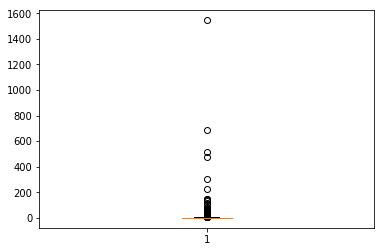

In [36]:
plt.boxplot(cdr3_summary[('count', 'difference')])

In [48]:
# Rename the columns
new_names = list()
for a, b in cdr3_summary.columns:
    if b == "":
        new_names.append(a)
    else:
        new_names.append("_".join([a,b]))
cdr3_summary.columns = new_names
cdr3_summary.head()

,CDR3,Patient_nunique,SampleRun_nunique,count_min,count_max,count_mean,count_median,count_difference
153062,CARVVEAAAGRIDYWGQGTLVT,2,2,1,1546,773.500000,773.5,1545
293,CAAGHYDSSGYWDYWGQGTLVT,6,6,3,693,283.500000,170.0,690
88271,CAREHRYSSYFYYYYMDVWGKGTAVT,5,5,2,515,143.800000,62.0,513
14664,CAKDLEPDFWSGSYNFDYWGQGTLVT,6,6,1,474,104.666667,22.5,473
138928,CARSGSYQENYFDYWGQGTLVT,6,6,1,307,121.500000,102.5,306


## Select samples with most overlapping clones

In [50]:
# First only select the CDR3 clones that are in more than 1 sample
public_clones = pd.merge(cdr3clones, cdr3_summary, on="CDR3")
public_clones = public_clones.sort_values(by="count_difference", ascending=False)
public_clones.head(25)

,Patient,SampleRun,CDR3,count,Patient_nunique,SampleRun_nunique,count_min,count_max,count_mean,count_median,count_difference
6016,RA-plus-1,LN91-run98,CARVVEAAAGRIDYWGQGTLVT,1546,2,2,1,1546,773.500000,773.5,1545
6015,RA-min-6,LN45-run142,CARVVEAAAGRIDYWGQGTLVT,1,2,2,1,1546,773.500000,773.5,1545
210,HC-2,LN90-run74,CAAGHYDSSGYWDYWGQGTLVT,11,6,6,3,693,283.500000,170.0,690
211,RA-min-1,LN97-run81,CAAGHYDSSGYWDYWGQGTLVT,660,6,6,3,693,283.500000,170.0,690
212,RA-min-2,LN98-run81,CAAGHYDSSGYWDYWGQGTLVT,329,6,6,3,693,283.500000,170.0,690
215,RA-plus-4,LN95-run81,CAAGHYDSSGYWDYWGQGTLVT,5,6,6,3,693,283.500000,170.0,690
214,RA-plus-1,LN91-run81,CAAGHYDSSGYWDYWGQGTLVT,3,6,6,3,693,283.500000,170.0,690
213,RA-min-3,LN99-run81,CAAGHYDSSGYWDYWGQGTLVT,693,6,6,3,693,283.500000,170.0,690
2887,RA-min-1,LN97-run81,CAREHRYSSYFYYYYMDVWGKGTAVT,62,5,5,2,515,143.800000,62.0,513
2889,RA-min-3,LN99-run81,CAREHRYSSYFYYYYMDVWGKGTAVT,515,5,5,2,515,143.800000,62.0,513


In [51]:
df_pivot = public_clones.pivot_table(columns=['Patient','SampleRun'], index='CDR3', values='count')
df_pivot = df_pivot.fillna(0)
df_pivot.head()

Patient                       HC-1       HC-10                   HC-2  \
SampleRun               LN89-run74 LN57-run142 LN57-run169 LN90-run74   
CDR3                                                                    
CAADISSWPMTGFDPWGQGTLVT        0.0         0.0         0.0        0.0   
CAADLYSSSWYGWGQGTLVT           0.0         0.0         0.0        0.0   
CAAERGGSSSFDYWGQGTLVT          0.0         0.0         0.0        0.0   
CAAGHCDSSGYWDYWGQGTLVT         0.0         0.0         0.0        0.0   
CAAGHHDSSGYWDYWGQGTLVT         0.0         0.0         0.0        1.0   

Patient                        HC-3                                HC-4  \
SampleRun               LN50-run141 LN50-run160 LN50-run162 LN51-run160   
CDR3                                                                      
CAADISSWPMTGFDPWGQGTLVT         0.0         0.0         0.0         0.0   
CAADLYSSSWYGWGQGTLVT            0.0         0.0         0.0         0.0   
CAAERGGSSSFDYWGQGTLVT           0.0         0.0         0.0         0.0   
CAAGHCDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   
CAAGHHDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   

Patient                                    HC-5     ...       RA-plus-6  \
SampleRun               LN51-run162 LN52-run160     ...     LN30-run162   
CDR3                                                ...                   
CAADISSWPMTGFDPWGQGTLVT         0.0         0.0     ...             0.0   
CAADLYSSSWYGWGQGTLVT            0.0         0.0     ...             0.0   
CAAERGGSSSFDYWGQGTLVT           0.0         0.0     ...             0.0   
CAAGHCDSSGYWDYWGQGTLVT          0.0         0.0     ...             0.0   
CAAGHHDSSGYWDYWGQGTLVT          0.0         0.0     ...             0.0   

Patient                               RA-plus-7               RA-plus-8  \
SampleRun               LN30-run181 LN49-run141 LN49-run162 LN29-run142   
CDR3                                                                      
CAADISSWPMTGFDPWGQGTLVT         0.0         0.0         0.0         0.0   
CAADLYSSSWYGWGQGTLVT            0.0         0.0         0.0         0.0   
CAAERGGSSSFDYWGQGTLVT           0.0         0.0         0.0         0.0   
CAAGHCDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   
CAAGHHDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   

Patient                                           RA-plus-9              \
SampleRun               LN29-run169 LN29-run181 LN31-run142 LN31-run169   
CDR3                                                                      
CAADISSWPMTGFDPWGQGTLVT         0.0         0.0         0.0         0.0   
CAADLYSSSWYGWGQGTLVT            0.0         0.0         0.0         0.0   
CAAERGGSSSFDYWGQGTLVT           0.0         0.0         0.0         0.0   
CAAGHCDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   
CAAGHHDSSGYWDYWGQGTLVT          0.0         0.0         0.0         0.0   

Patient                              
SampleRun               LN31-run181  
CDR3                                 
CAADISSWPMTGFDPWGQGTLVT         0.0  
CAADLYSSSWYGWGQGTLVT            0.0  
CAAERGGSSSFDYWGQGTLVT           0.0  
CAAGHCDSSGYWDYWGQGTLVT          0.0  
CAAGHHDSSGYWDYWGQGTLVT          0.0  

[5 rows x 71 columns]

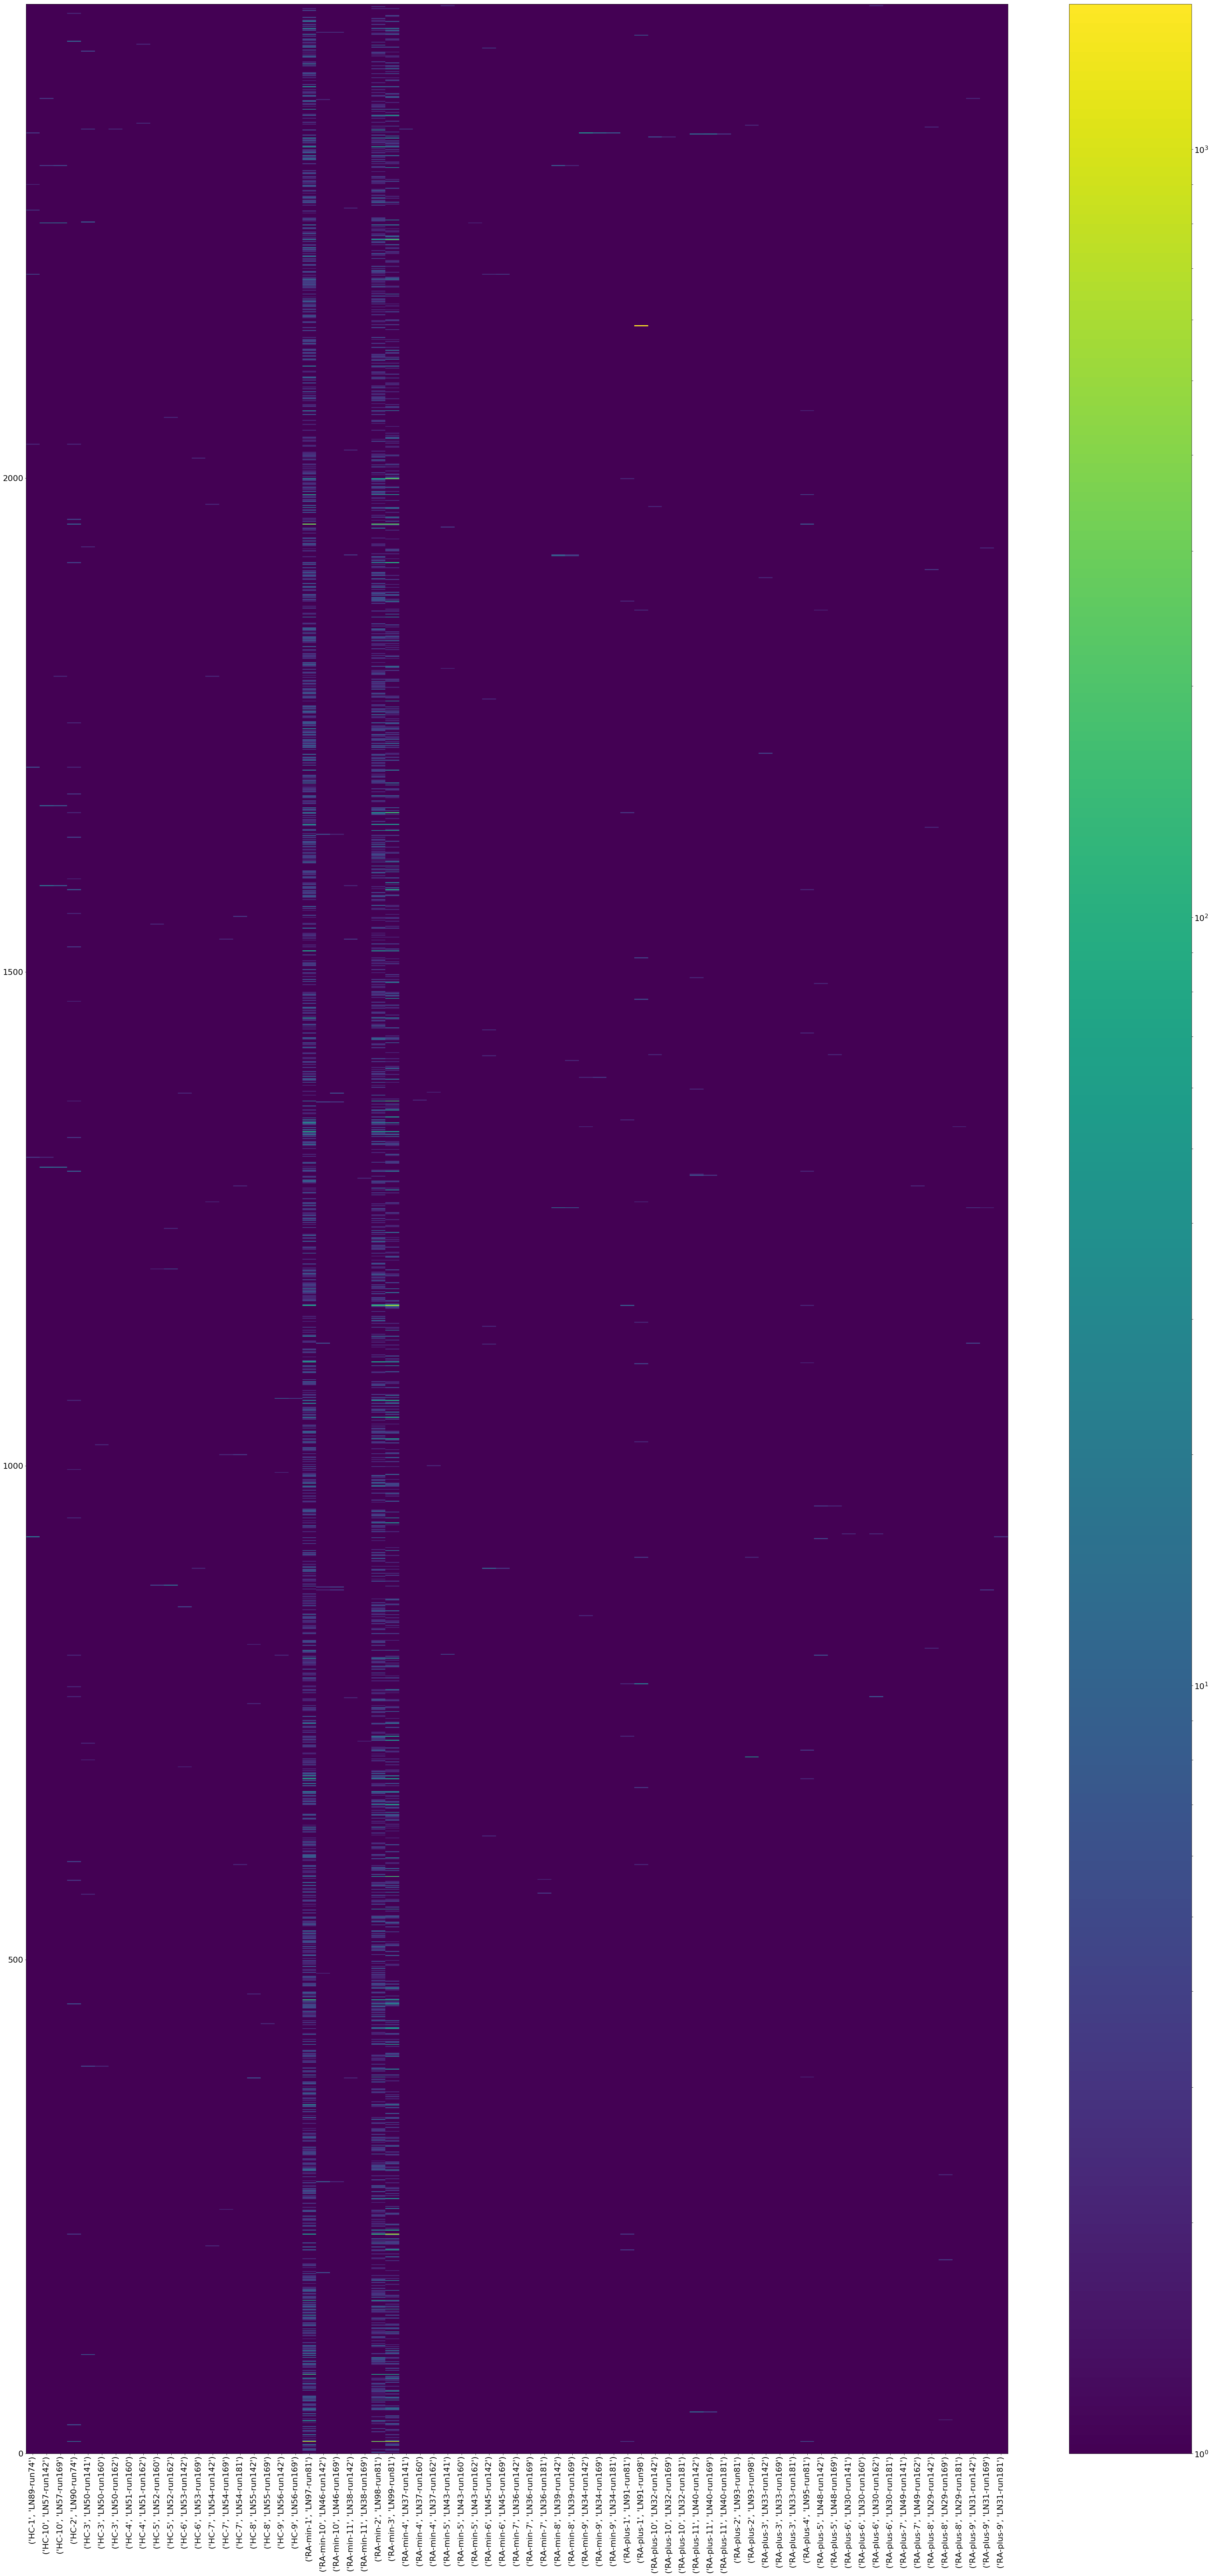

In [66]:
fig, ax = plt.subplots(figsize=(60, 160))
fig.subplots_adjust(bottom=0.3)


# is used for log scaling
Z1 = df_pivot.values
Z1[Z1 <= 0] = Z1[Z1 > 0].min()  # Replace any value below or equal to zero with lowest value above zero

plt.pcolor(df_pivot.values, cmap=plt.cm.viridis, norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()))
plt.colorbar()
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns, rotation=90)
#plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index, rotation=0)

fig.savefig("test.pdf")

## Determine direction of contamination

In [146]:
from_list = list()
to_list = list()
from_samples = list()
to_samples = list()
cdr3_list = list()
cdr3s = public_clones['CDR3'].unique()

In [147]:
for cdr3 in cdr3s:
    get_clones = public_clones[public_clones['CDR3'] == cdr3]

    # Guess the source
    count_max = int(get_clones['count_max'].unique())
    max_clone = get_clones[get_clones['count'] == count_max]
    max_clone = max_clone.reset_index()
    source = list()
    source_sample = list()
    for i in range(len(max_clone)):
        source.append(max_clone['Patient'][i])
        source_sample.append(max_clone['SampleRun'][i])
    
    # Guess the target
    rest_clones = get_clones[get_clones['count'] < count_max]
    rest_clones = rest_clones.reset_index()
    for i in range(len(rest_clones)):
        for j in range(len(source)):
            from_list.append(source[j])
            from_samples.append(source_sample[j])
            to_list.append(rest_clones['Patient'][i])
            to_samples.append(rest_clones['SampleRun'][i])
            cdr3_list.append(cdr3)
contamination = pd.DataFrame({'CDR3': cdr3_list, 'source': from_list, 'source_sample':from_samples, 'destination': to_list, 'destination_sample': to_samples})

In [148]:
contamination.head()

,CDR3,source,source_sample,destination,destination_sample
0,CARVVEAAAGRIDYWGQGTLVT,RA-plus-1,LN91-run98,RA-min-6,LN45-run142
1,CAAGHYDSSGYWDYWGQGTLVT,RA-min-3,LN99-run81,HC-2,LN90-run74
2,CAAGHYDSSGYWDYWGQGTLVT,RA-min-3,LN99-run81,RA-min-1,LN97-run81
3,CAAGHYDSSGYWDYWGQGTLVT,RA-min-3,LN99-run81,RA-min-2,LN98-run81
4,CAAGHYDSSGYWDYWGQGTLVT,RA-min-3,LN99-run81,RA-plus-4,LN95-run81


In [152]:
check = contamination.groupby(['source', 'source_sample', 'destination', 'destination_sample']).agg({'CDR3': 'nunique'})
check = check.reset_index()
check = check.sort_values(by="CDR3", ascending=False)

In [154]:
check['same_patient'] = check['source'] == check['destination']
check

,source,source_sample,destination,destination_sample,CDR3,same_patient
89,RA-min-1,LN97-run81,RA-min-2,LN98-run81,614,False
90,RA-min-1,LN97-run81,RA-min-3,LN99-run81,532,False
127,RA-min-2,LN98-run81,RA-min-1,LN97-run81,353,False
128,RA-min-2,LN98-run81,RA-min-3,LN99-run81,291,False
136,RA-min-3,LN99-run81,RA-min-2,LN98-run81,289,False
135,RA-min-3,LN99-run81,RA-min-1,LN97-run81,286,False
96,RA-min-1,LN97-run81,RA-plus-4,LN95-run81,37,False
139,RA-min-3,LN99-run81,RA-plus-1,LN91-run81,24,False
140,RA-min-3,LN99-run81,RA-plus-4,LN95-run81,17,False
132,RA-min-3,LN99-run81,HC-2,LN90-run74,14,False


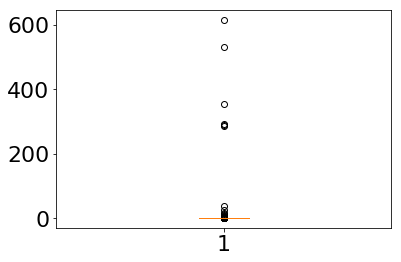

In [151]:
plt.boxplot(check['CDR3'])
plt.show()